# Lesson 1: Calculation of NDVI

The **normalized difference vegetation index (NDVI)** is a simple graphical indicator that can be used to analyze remote sensing measurements, often from a space platform, assessing whether or not the target being observed contains live green vegetation.

The NDVI is calculated from these individual measurements as follows:

$NDVI=\frac{(NIR-Red)}{(NIR+Red)}$

where: 
Red = red band
NIR = near-infrared band

(See [Wikipedia](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) )

In [1]:
#required libraries
import rasterio as rio #to handle raster data
from pathlib import Path #to point directory paths
import numpy as np #multi-dimensional array calculation
import matplotlib.pyplot as plt #plots, visualization

# (Option 1) Read Sentinel Data

Based on [Sentinel-2A](https://sentinel.esa.int/web/sentinel/missions/sentinel-2) data.

In [14]:
#set the path to the folder containing Sentinel-2A images
# filepath = Path('./data/sentinel/2a') (Amazon - Peru?)
#set the path to the folder containing Sentinel-2B images
filepath = Path('./data/sentinel/2b')


In [15]:
# Identifying bands
dictBands= {}
for fn in list(filepath.glob('*.jp2')):
    key= fn.stem[-7:-4]
    dictBands[key] = fn

In [16]:
# Loading NIR and RED bands
band_nir= rio.open(dictBands['B08']).read()
band_red= rio.open(dictBands['B04']).read()
# tci=rio.open(dictBands['TCI']).read()

#Task 1
band_green= rio.open(dictBands['B03']).read()
band_blue = rio.open(dictBands['B02']).read()

In [17]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')
# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir.astype(float) + band_red.astype(float))

#Task 1
ndwi = (band_green.astype(float) - band_nir.astype(float)) / (band_green.astype(float) + band_nir.astype(float))

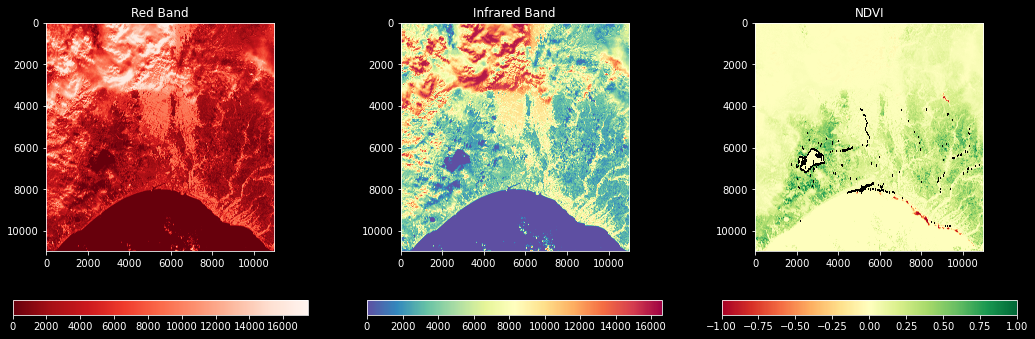

In [18]:
#plot images
fig,axs = plt.subplots(1,3,figsize=(18,6))
im0=axs[0].imshow(band_red[0],cmap='Reds_r')
axs[0].title.set_text('Red Band')
fig.colorbar(im0,ax=axs[0],location='bottom')

im1=axs[1].imshow(band_nir[0],cmap='Spectral_r')
axs[1].title.set_text('Infrared Band')
fig.colorbar(im1,ax=axs[1],location='bottom')

im2=axs[2].imshow(ndvi[0],vmin=-1,vmax=1,cmap='RdYlGn')
axs[2].title.set_text('NDVI')
fig.colorbar(im2,ax=axs[2],location='bottom');

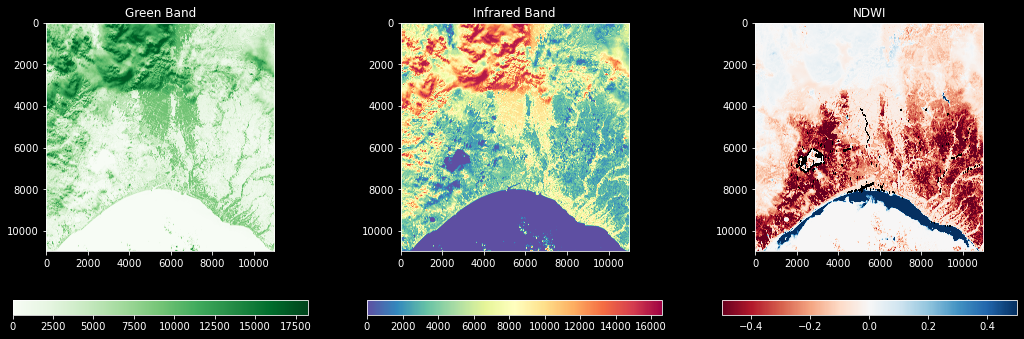

In [19]:
#Task 1
#plot images
fig,axs = plt.subplots(1,3,figsize=(18,6))
im0=axs[0].imshow(band_green[0],cmap='Greens')
axs[0].title.set_text('Green Band')
fig.colorbar(im0,ax=axs[0],location='bottom')

im1=axs[1].imshow(band_nir[0],cmap='Spectral_r')
axs[1].title.set_text('Infrared Band')
fig.colorbar(im1,ax=axs[1],location='bottom')

im2=axs[2].imshow(ndwi[0],vmin=-0.5,vmax=0.5,cmap='RdBu')
axs[2].title.set_text('NDWI')
fig.colorbar(im2,ax=axs[2],location='bottom');

# (Option 2) Read Landsat Data

Based on [LandSat](https://www.usgs.gov/landsat-missions) data

In [8]:
filepath = Path('./data/landsat')

In [9]:
# Identifying bands
dictBands= {}
for fn in list(filepath.glob('*.TIF')):
    key= fn.stem[-2:]
    dictBands[key] = fn

In [10]:
# Loading NIR and RED bands
band_nir= rio.open(dictBands['B4']).read()
band_red= rio.open(dictBands['B3']).read()

#Task 1
band_green= rio.open(dictBands['B2']).read()
band_blue = rio.open(dictBands['B1']).read()

# Calculate NDVI/NDWI

In [11]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')
# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir.astype(float) + band_red.astype(float))

#Task 1
ndwi = (band_green.astype(float) - band_nir.astype(float)) / (band_green.astype(float) + band_nir.astype(float))

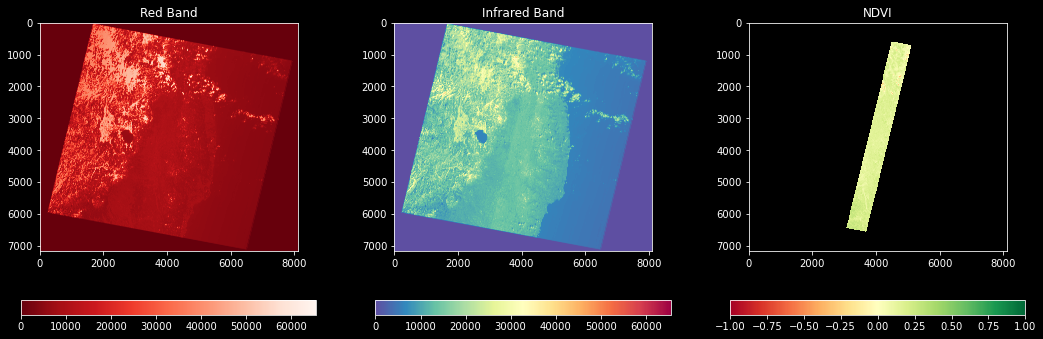

In [12]:
#plot images
fig,axs = plt.subplots(1,3,figsize=(18,6))
im0=axs[0].imshow(band_red[0],cmap='Reds_r')
axs[0].title.set_text('Red Band')
fig.colorbar(im0,ax=axs[0],location='bottom')

im1=axs[1].imshow(band_nir[0],cmap='Spectral_r')
axs[1].title.set_text('Infrared Band')
fig.colorbar(im1,ax=axs[1],location='bottom')

im2=axs[2].imshow(ndvi[0],vmin=-1,vmax=1,cmap='RdYlGn')
axs[2].title.set_text('NDVI')
fig.colorbar(im2,ax=axs[2],location='bottom');

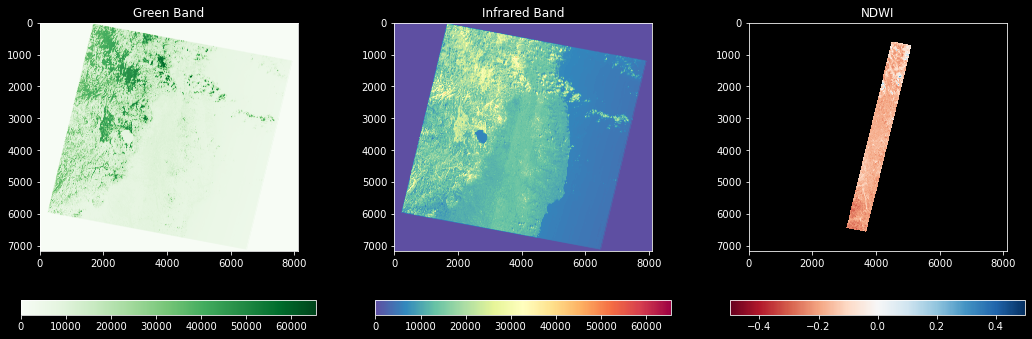

In [13]:
#Task 1
#plot images
fig,axs = plt.subplots(1,3,figsize=(18,6))
im0=axs[0].imshow(band_green[0],cmap='Greens')
axs[0].title.set_text('Green Band')
fig.colorbar(im0,ax=axs[0],location='bottom')

im1=axs[1].imshow(band_nir[0],cmap='Spectral_r')
axs[1].title.set_text('Infrared Band')
fig.colorbar(im1,ax=axs[1],location='bottom')

im2=axs[2].imshow(ndwi[0],vmin=-0.5,vmax=0.5,cmap='RdBu')
axs[2].title.set_text('NDWI')
fig.colorbar(im2,ax=axs[2],location='bottom');